### Imports

In [30]:
import descartes
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests

from pandas.io.json import json_normalize
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', None)

# API Calls

## Acquire Parameter and State Codes

In [2]:
# API call to review parameters
param = requests.get('https://aqs.epa.gov/data/api/list/parametersByClass?email=skbourdeau930@gmail.com&key=dunwolf52&pc=CRITERIA')

# check for 200 status code
# print(param.status_code)

# create DF
params = param.json()
parameters = json_normalize(params['Data']) 
parameters

,code,value_represented
0,14129,Lead (TSP) LC
1,42101,Carbon monoxide
2,42401,Sulfur dioxide
3,42602,Nitrogen dioxide (NO2)
4,44201,Ozone
5,81102,PM10 Total 0-10um STP
6,85129,Lead PM10 LC FRM/FEM
7,88101,PM2.5 - Local Conditions


In [6]:
# get FIPS code for states

state = requests.get("https://aqs.epa.gov/data/api/list/states?email=skbourdeau930@gmail.com&key=dunwolf52")

# create DF
states = state.json()
states1 = json_normalize(states['Data']) 
states1

,code,value_represented
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida


## NY Data

In [25]:
# make API call for NYS Daily Data and check response code
response = requests.get("https://aqs.epa.gov/data/api/dailyData/byState?email=skbourdeau930@gmail.com&key=dunwolf52&param=14129,42101,42401,42602,44201,81102,85129,88101&bdate=20200101&edate=20200401&state=36")
response.status_code

# save response as json
data = response.json()
# data.keys()

# turn data from json into DataFrame and view
df = json_normalize(data['Data']) 
df.head()

,aqi,arithmetic_mean,cbsa,cbsa_code,city,county,county_code,date_local,date_of_last_change,datum,event_type,first_max_hour,first_max_value,latitude,local_site_name,longitude,method,method_code,observation_count,observation_percent,parameter,parameter_code,poc,pollutant_standard,sample_duration,site_address,site_number,state,state_code,units_of_measure,validity_indicator
0,NaN,0.325000,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,14,0.6,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,8,100.0,Sulfur dioxide,42401,3,SO2 3-hour 1971,3-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y
1,NaN,0.400000,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,23,0.4,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,1,100.0,Sulfur dioxide,42401,3,SO2 24-hour 1971,24-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y
2,0.0,0.358333,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,16,0.9,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,24,100.0,Sulfur dioxide,42401,3,SO2 1-hour 2010,1 HOUR,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y
3,0.0,0.358333,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,16,0.9,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,24,100.0,Sulfur dioxide,42401,3,SO2 Annual 1971,1 HOUR,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y
4,NaN,0.162500,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-28,2020-04-04,WGS84,None,2,0.2,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,8,100.0,Sulfur dioxide,42401,3,SO2 3-hour 1971,3-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y


In [27]:
# inspect df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11809 entries, 0 to 11808
Data columns (total 31 columns):
aqi                    7566 non-null float64
arithmetic_mean        11809 non-null float64
cbsa                   10919 non-null object
cbsa_code              10919 non-null object
city                   11809 non-null object
county                 11809 non-null object
county_code            11809 non-null object
date_local             11809 non-null object
date_of_last_change    11809 non-null object
datum                  11809 non-null object
event_type             11809 non-null object
first_max_hour         11809 non-null int64
first_max_value        11809 non-null float64
latitude               11809 non-null float64
local_site_name        11809 non-null object
longitude              11809 non-null float64
method                 11809 non-null object
method_code            11809 non-null object
observation_count      11809 non-null int64
observation_percent    11809 non-n

## Plotting

In [31]:
geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
geometry[:3]

In [32]:
crs = {'init':'epsg:4326'}

geo_df = gpd.GeoDataFrame(df,
                         crs=crs,
                         geometry=geometry)
geo_df.head()

,aqi,arithmetic_mean,cbsa,cbsa_code,city,county,county_code,date_local,date_of_last_change,datum,event_type,first_max_hour,first_max_value,latitude,local_site_name,longitude,method,method_code,observation_count,observation_percent,parameter,parameter_code,poc,pollutant_standard,sample_duration,site_address,site_number,state,state_code,units_of_measure,validity_indicator,geometry
0,NaN,0.325000,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,14,0.6,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,8,100.0,Sulfur dioxide,42401,3,SO2 3-hour 1971,3-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y,POINT (-77.54817 43.14618)
1,NaN,0.400000,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,23,0.4,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,1,100.0,Sulfur dioxide,42401,3,SO2 24-hour 1971,24-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y,POINT (-77.54817 43.14618)
2,0.0,0.358333,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,16,0.9,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,24,100.0,Sulfur dioxide,42401,3,SO2 1-hour 2010,1 HOUR,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y,POINT (-77.54817 43.14618)
3,0.0,0.358333,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-29,2020-04-04,WGS84,None,16,0.9,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,24,100.0,Sulfur dioxide,42401,3,SO2 Annual 1971,1 HOUR,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y,POINT (-77.54817 43.14618)
4,NaN,0.162500,"Rochester, NY",40380,Rochester,Monroe,055,2020-02-28,2020-04-04,WGS84,None,2,0.2,43.14618,ROCHESTER 2,-77.54817,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,560,8,100.0,Sulfur dioxide,42401,3,SO2 3-hour 1971,3-HR BLK AVG,"2 YARMOUTH ROAD, RG&E Substation",1007,New York,36,Parts per billion,Y,POINT (-77.54817 43.14618)


In [ ]:
street_map = 

NameError: name 'street_map' is not defined

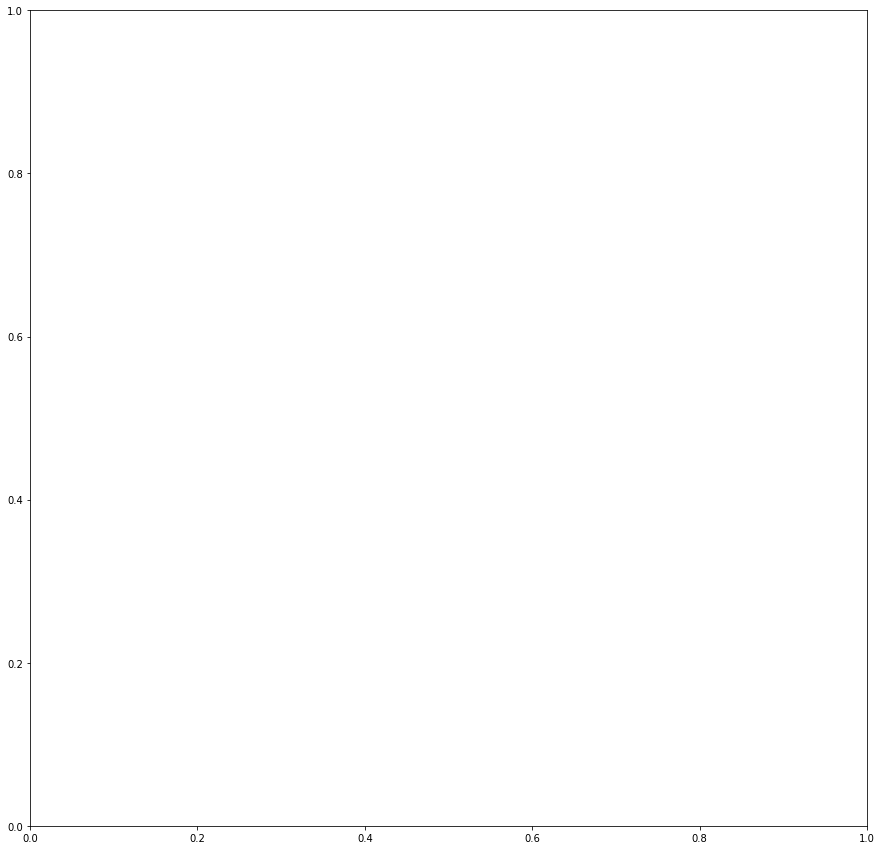

In [33]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['arithmetic_mean'] == 0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Mean')
plt.legend(prop={'size':15})